In [17]:
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt 

In [43]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 5)

In [3]:
dft = pd.read_csv('/content/drive/MyDrive/Studium/3. Semester/Fallstudie/twitter_data.csv', delimiter=",")
dfn = pd.read_csv('/content/drive/MyDrive/Studium/3. Semester/Fallstudie/apple_news.csv', delimiter=",")

In [4]:
dft = dft.drop('Unnamed: 0',1)
print(dft)

    username                   id                 date  retweet  likes  \
0       CNBC  1346487622399451136  2021-01-05 16:04:00        3      7   
1       CNBC  1346487462017851392  2021-01-05 16:03:22        4      5   
2       CNBC  1346486730862559238  2021-01-05 16:00:27        7     14   
3       CNBC  1346485814121930754  2021-01-05 15:56:49        4     11   
4       CNBC  1346485240517292032  2021-01-05 15:54:32        6     18   
..       ...                  ...                  ...      ...    ...   
145  nytimes  1346245100733665282  2021-01-05 00:00:18       85    434   
146  nytimes  1346239996613816321  2021-01-04 23:40:01      104      0   
147  nytimes  1346238758258171905  2021-01-04 23:35:06       58    468   
148  nytimes  1346236247489073155  2021-01-04 23:25:07      684   3759   
149  nytimes  1346234983644594181  2021-01-04 23:20:06     3306      0   

                                                  text  
0    b'GOP pollster Frank Lutz says "the next 48 ho...

In [5]:
dft = dft.drop(['username', 'retweet', 'likes', 'date'],1)
print(dft)

                      id                                               text
0    1346487622399451136  b'GOP pollster Frank Lutz says "the next 48 ho...
1    1346487462017851392  b"Largest global study of 'long Covid' finds m...
2    1346486730862559238  b'More new Covid strains likely to arrive in U...
3    1346485814121930754  b'These states are already paying out the new ...
4    1346485240517292032  b'New for subscribers: Goldman remains bullish...
..                   ...                                                ...
145  1346245100733665282  b'President-elect Joe Biden confronts an econo...
146  1346239996613816321  b'RT @LFFriedman: SCOOP: EPA is expected tomor...
147  1346238758258171905  b'The sprawling efforts to register more voter...
148  1346236247489073155  b'The leader of the far-right group  Proud Boy...
149  1346234983644594181  b'RT @ktbenner: The leader of the Proud Boys, ...

[150 rows x 2 columns]


In [38]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    #remove <>
    txt = re.sub(r'<', '', txt)
    txt = re.sub(r'>', '', txt)
    return txt

In [41]:
dft['text'] = dft['text'].apply(cleanUpTweet)
print(dft)

                      id                                               text  \
0    1346487622399451136  b'GOP pollster Frank Lutz says "the next 48 ho...   
1    1346487462017851392  b"Largest global study of 'long Covid' finds m...   
2    1346486730862559238  b'More new Covid strains likely to arrive in U...   
3    1346485814121930754  b'These states are already paying out the new ...   
4    1346485240517292032  b'New for subscribers: Goldman remains bullish...   
5    1346483793989951490  b"From growing up in poverty to battling the C...   
6    1346483095608942592  b'If you are looking to invest, how do you kno...   
7    1346483059575681025  b'\xe2\x80\x9cWe wanted to create $10,000 a mo...   
8    1346481944628891651  b"GM's U.S. sales rose 4.8% in the fourth quar...   
9    1346479317623001088  b'New York Governor Andrew Cuomo has confirmed...   
10   1346479222747852808  b'"The Power of Habit" author shows you how to...   
11   1346477292042608643  b'Here\xe2\x80\x99s how to

In [11]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [18]:
dft['Subjectivity'] = dft['text'].apply(getTextSubjectivity)
dft['Polarity'] = dft['text'].apply(getTextPolarity)
print(dft)

                      id                                               text  \
0    1346487622399451136  b'GOP pollster Frank Lutz says "the next 48 ho...   
1    1346487462017851392  b"Largest global study of 'long Covid' finds m...   
2    1346486730862559238  b'More new Covid strains likely to arrive in U...   
3    1346485814121930754  b'These states are already paying out the new ...   
4    1346485240517292032  b'New for subscribers: Goldman remains bullish...   
..                   ...                                                ...   
145  1346245100733665282  b'President-elect Joe Biden confronts an econo...   
146  1346239996613816321  b'SCOOP: EPA is expected tomorrow to unveil th...   
147  1346238758258171905  b'The sprawling efforts to register more voter...   
148  1346236247489073155  b'The leader of the far-right group  Proud Boy...   
149  1346234983644594181  b'The leader of the Proud Boys, Enrique Tarrio...   

     Subjectivity  Polarity  
0        0.500000 -0.

In [20]:
dft = dft.drop(dft[dft['text'] == ''].index)
print(dft)

                      id                                               text  \
0    1346487622399451136  b'GOP pollster Frank Lutz says "the next 48 ho...   
1    1346487462017851392  b"Largest global study of 'long Covid' finds m...   
2    1346486730862559238  b'More new Covid strains likely to arrive in U...   
3    1346485814121930754  b'These states are already paying out the new ...   
4    1346485240517292032  b'New for subscribers: Goldman remains bullish...   
..                   ...                                                ...   
145  1346245100733665282  b'President-elect Joe Biden confronts an econo...   
146  1346239996613816321  b'SCOOP: EPA is expected tomorrow to unveil th...   
147  1346238758258171905  b'The sprawling efforts to register more voter...   
148  1346236247489073155  b'The leader of the far-right group  Proud Boy...   
149  1346234983644594181  b'The leader of the Proud Boys, Enrique Tarrio...   

     Subjectivity  Polarity  
0        0.500000 -0.

In [21]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [22]:
dft['Score'] = dft['Polarity'].apply(getTextAnalysis)
print(dft)

                      id                                               text  \
0    1346487622399451136  b'GOP pollster Frank Lutz says "the next 48 ho...   
1    1346487462017851392  b"Largest global study of 'long Covid' finds m...   
2    1346486730862559238  b'More new Covid strains likely to arrive in U...   
3    1346485814121930754  b'These states are already paying out the new ...   
4    1346485240517292032  b'New for subscribers: Goldman remains bullish...   
..                   ...                                                ...   
145  1346245100733665282  b'President-elect Joe Biden confronts an econo...   
146  1346239996613816321  b'SCOOP: EPA is expected tomorrow to unveil th...   
147  1346238758258171905  b'The sprawling efforts to register more voter...   
148  1346236247489073155  b'The leader of the far-right group  Proud Boy...   
149  1346234983644594181  b'The leader of the Proud Boys, Enrique Tarrio...   

     Subjectivity  Polarity     Score  
0        0.

In [23]:
print(dft.head(50))

                     id                                               text  \
0   1346487622399451136  b'GOP pollster Frank Lutz says "the next 48 ho...   
1   1346487462017851392  b"Largest global study of 'long Covid' finds m...   
2   1346486730862559238  b'More new Covid strains likely to arrive in U...   
3   1346485814121930754  b'These states are already paying out the new ...   
4   1346485240517292032  b'New for subscribers: Goldman remains bullish...   
5   1346483793989951490  b"From growing up in poverty to battling the C...   
6   1346483095608942592  b'If you are looking to invest, how do you kno...   
7   1346483059575681025  b'\xe2\x80\x9cWe wanted to create $10,000 a mo...   
8   1346481944628891651  b"GM's U.S. sales rose 4.8% in the fourth quar...   
9   1346479317623001088  b'New York Governor Andrew Cuomo has confirmed...   
10  1346479222747852808  b'"The Power of Habit" author shows you how to...   
11  1346477292042608643  b'Here\xe2\x80\x99s how to set workout 

In [24]:
positive = dft[dft['Score'] == 'Positive']

print(str(positive.shape[0]/(dft.shape[0])*100) + " % of positive tweets")

43.333333333333336 % of positive tweets


<BarContainer object of 3 artists>

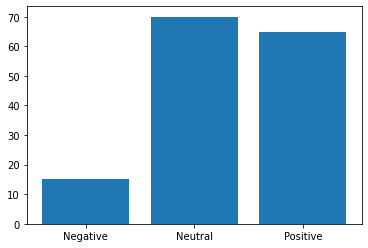

In [25]:
labels = dft.groupby('Score').count().index.values

values = dft.groupby('Score').size().values

plt.bar(labels, values)

In [27]:
dfn = dfn.drop(['Unnamed: 0','source','author', 'url', 'urlToImage', 'description', 'publishedAt'], 1)
print(dfn)

                                                 title  \
0    The best Cyber Monday Apple Watch deals still ...   
1    UnitedHealthcare is offering Motion enrollees ...   
2    The Apple Car news is completely irrelevant to...   
3    Apple says these were the best apps of 2020, i...   
4    Apple rises 3% after report says the company a...   
..                                                 ...   
360  Wie das Smartphone 40 Jahre Wachstum in der Ka...   
361  Eine etwas andere Aktienanalyse: Das ist die b...   
362  Deutsche Technologiefirmen blicken optimistisc...   
363  4.Screen: Navigation zu neuen Erlösmodellen im...   
364  Buchauszug Melanie Bergermann und Volker Ter H...   

                                               content  
0    When you buy through our links, we may earn mo...  
1    UnitedHealthcare is enhancing its well-being p...  
2    In the annals of the electric-car and self-dri...  
3    Apple released its annual end-of-year roundup,...  
4    <ul><li>Apple

In [44]:
dfn['Subjectivity_title'] = dfn['title'].apply(getTextSubjectivity)
#dfn['Subjectivity_content'] = dfn['content'].apply(getTextSubjectivity)
dfn['Polarity_title'] = dfn['title'].apply(getTextPolarity)
#dfn['Polarity_content'] = dfn['content'].apply(getTextPolarity)
print(dfn)

                                                 title  \
0    The best Cyber Monday Apple Watch deals still ...   
1    UnitedHealthcare is offering Motion enrollees ...   
..                                                 ...   
363  4.Screen: Navigation zu neuen Erlösmodellen im...   
364  Buchauszug Melanie Bergermann und Volker Ter H...   

                                               content  Subjectivity_title  \
0    When you buy through our links, we may earn mo...                0.35   
1    UnitedHealthcare is enhancing its well-being p...                0.80   
..                                                 ...                 ...   
363  Das Start-up will Autofahrern unterwegs passen...                0.00   
364  Buchauszug Melanie Bergermann und Volker Ter H...                0.00   

     Polarity_title  
0               0.7  
1               0.4  
..              ...  
363             0.0  
364             0.0  

[365 rows x 4 columns]


In [46]:
dfn['Score_title'] = dfn['Polarity_title'].apply(getTextAnalysis)
print(dfn)

                                                 title  \
0    The best Cyber Monday Apple Watch deals still ...   
1    UnitedHealthcare is offering Motion enrollees ...   
..                                                 ...   
363  4.Screen: Navigation zu neuen Erlösmodellen im...   
364  Buchauszug Melanie Bergermann und Volker Ter H...   

                                               content  Subjectivity_title  \
0    When you buy through our links, we may earn mo...                0.35   
1    UnitedHealthcare is enhancing its well-being p...                0.80   
..                                                 ...                 ...   
363  Das Start-up will Autofahrern unterwegs passen...                0.00   
364  Buchauszug Melanie Bergermann und Volker Ter H...                0.00   

     Polarity_title Score_title  
0               0.7    Positive  
1               0.4    Positive  
..              ...         ...  
363             0.0     Neutral  
364         

<BarContainer object of 3 artists>

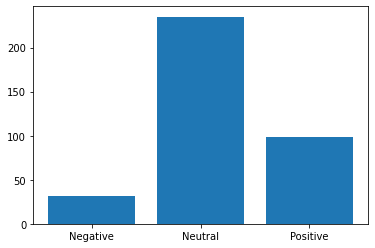

In [47]:
labels_n = dfn.groupby('Score_title').count().index.values

values_n = dfn.groupby('Score_title').size().values

plt.bar(labels_n, values_n)